## Setup for reproducible results

In [1]:
import os
import random

os.environ['PYTHONHASHSEED']=str(1)

SEED = 20

def seed_rnd(SEED):
    os.environ['PYTHONHASHSEED']=str(SEED)
    random.seed(SEED)
    np.random.RandomState(SEED)
    tf.random.set_seed(SEED)

## Import dependencies

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import stats
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

## Read file with train data

In [3]:
input_file = "CompareColocation.csv"

train_data = pd.read_csv(input_file)
train_data

,NAM 1 Hum,NAM 2 Hum,NAM 1 Temp,NAM 2 Temp,Luftdaten Hum,Luftdaten Temp,Luftdaten PM10,Luftdaten PM2.5,Reference PM10,Reference PM2.5
0,32.98,29.52,22.44,24.35,25.24,33.03,6.144583,1.817083,37.3,12.4
1,29.13,27.58,23.75,25.11,26.95,29.98,4.992609,1.788261,36.3,10.8
2,29.48,28.70,24.26,25.40,32.90,25.45,6.684167,1.894167,30.1,10.2
3,28.76,28.01,24.17,25.25,32.92,25.35,5.489130,1.889565,33.1,11.1
4,27.21,27.12,25.75,26.10,33.55,25.32,5.492500,1.811250,34.9,11.2
...,...,...,...,...,...,...,...,...,...,...
8779,89.46,94.57,20.45,19.72,99.90,19.24,NaN,NaN,34.0,30.2
8780,81.89,92.20,22.03,20.78,99.90,20.62,NaN,NaN,33.1,28.1
8781,70.47,83.17,25.05,22.73,96.53,25.18,NaN,NaN,31.3,22.3
8782,60.90,72.81,27.05,25.11,65.98,34.66,NaN,NaN,36.8,20.1


## Remove unnecessary data

In [4]:
del train_data["NAM 1 Temp"]
del train_data["NAM 2 Temp"]
del train_data["Luftdaten Hum"]
del train_data["Luftdaten Temp"]
del train_data["Luftdaten PM10"]
del train_data["Reference PM10"]
train_data

,NAM 1 Hum,NAM 2 Hum,Luftdaten PM2.5,Reference PM2.5
0,32.98,29.52,1.817083,12.4
1,29.13,27.58,1.788261,10.8
2,29.48,28.70,1.894167,10.2
3,28.76,28.01,1.889565,11.1
4,27.21,27.12,1.811250,11.2
...,...,...,...,...
8779,89.46,94.57,NaN,30.2
8780,81.89,92.20,NaN,28.1
8781,70.47,83.17,NaN,22.3
8782,60.90,72.81,NaN,20.1


## Remove rows without data from all sensors

In [5]:
train_data.replace('', np.nan, inplace=True)
train_data.dropna(inplace=True)
train_data

,NAM 1 Hum,NAM 2 Hum,Luftdaten PM2.5,Reference PM2.5
0,32.98,29.52,1.817083,12.4
1,29.13,27.58,1.788261,10.8
2,29.48,28.70,1.894167,10.2
3,28.76,28.01,1.889565,11.1
4,27.21,27.12,1.811250,11.2
...,...,...,...,...
8755,82.87,87.06,16.277727,16.2
8756,82.67,88.92,16.276087,16.6
8757,81.74,90.18,13.645652,15.6
8758,69.58,82.91,10.630000,15.7


## Calculate average humidity values

In [6]:
train_data["Average Hum"] = (train_data["NAM 1 Hum"] + train_data["NAM 2 Hum"]) / 2
train_data

,NAM 1 Hum,NAM 2 Hum,Luftdaten PM2.5,Reference PM2.5,Average Hum
0,32.98,29.52,1.817083,12.4,31.250
1,29.13,27.58,1.788261,10.8,28.355
2,29.48,28.70,1.894167,10.2,29.090
3,28.76,28.01,1.889565,11.1,28.385
4,27.21,27.12,1.811250,11.2,27.165
...,...,...,...,...,...
8755,82.87,87.06,16.277727,16.2,84.965
8756,82.67,88.92,16.276087,16.6,85.795
8757,81.74,90.18,13.645652,15.6,85.960
8758,69.58,82.91,10.630000,15.7,76.245


## Remove unnecessary data

In [7]:
del train_data["NAM 1 Hum"]
del train_data["NAM 2 Hum"]
train_data

,Luftdaten PM2.5,Reference PM2.5,Average Hum
0,1.817083,12.4,31.250
1,1.788261,10.8,28.355
2,1.894167,10.2,29.090
3,1.889565,11.1,28.385
4,1.811250,11.2,27.165
...,...,...,...
8755,16.277727,16.2,84.965
8756,16.276087,16.6,85.795
8757,13.645652,15.6,85.960
8758,10.630000,15.7,76.245


## Shuffle data

In [8]:
# Seed the random number generators
seed_rnd(SEED)

train_data = train_data.sample(frac=1, random_state=SEED).reset_index(drop=True)
train_data

,Luftdaten PM2.5,Reference PM2.5,Average Hum
0,4.688696,20.8,55.920
1,2.436364,12.1,66.480
2,4.306250,16.3,70.125
3,3.019130,15.6,57.355
4,7.498182,18.5,73.945
...,...,...,...
7195,6.750000,15.4,60.715
7196,1.846667,12.8,27.660
7197,20.185909,17.0,94.355
7198,14.807083,30.4,74.375


## Select data to train the model

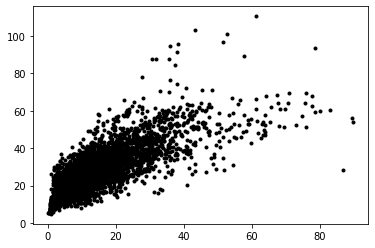

In [9]:
# Select x values
# PM data from the Luftdaten device and mean value of relative humidity
x_values = train_data.iloc[:,[0,2]].copy()

# Select y values
# PM data from the reference device
y_values = train_data["Reference PM2.5"]

# Plot data
plt.plot(x_values["Luftdaten PM2.5"], y_values, "k.")
plt.show()

## Split data for training, validation and testing

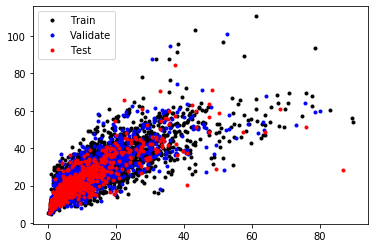

In [10]:
SAMPLES = train_data.shape[0]

# 65% for training
TRAIN_SPLIT = int(0.65 * SAMPLES)
# 25% for testing (so next division at 65% + 25% = 90%)
TEST_SPLIT = int(0.25 * SAMPLES + TRAIN_SPLIT)

# Store new data sets
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

# Plot
plt.plot(x_train["Luftdaten PM2.5"], y_train, "k.", label="Train")
plt.plot(x_validate["Luftdaten PM2.5"], y_validate, "b.", label="Validate")
plt.plot(x_test["Luftdaten PM2.5"], y_test, "r.", label="Test")
plt.legend()
plt.show()

## Define the ML model

In [11]:
from tensorflow.keras import layers

model = tf.keras.Sequential()

model.add(layers.Dense(16, activation="relu", input_shape=(2,)))
model.add(layers.Dense(16, activation="relu"))
model.add(layers.Dense(1))

model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


## Train the ML model

In [12]:
history = model.fit(x_train, y_train, epochs=250, batch_size=32, validation_data=(x_validate, y_validate))

Epoch 1/250
147/147 [==============================] - 0s 1ms/step - loss: 127.4700 - mae: 7.7825 - val_loss: 58.3859 - val_mae: 5.4073
Epoch 2/250
147/147 [==============================] - 0s 612us/step - loss: 57.0111 - mae: 5.3947 - val_loss: 56.2895 - val_mae: 5.2695
Epoch 3/250
147/147 [==============================] - 0s 680us/step - loss: 55.6659 - mae: 5.2935 - val_loss: 54.4799 - val_mae: 5.2222
Epoch 4/250
147/147 [==============================] - 0s 680us/step - loss: 54.1369 - mae: 5.1981 - val_loss: 57.0904 - val_mae: 5.3009
Epoch 5/250
147/147 [==============================] - 0s 680us/step - loss: 52.8279 - mae: 5.0931 - val_loss: 51.0330 - val_mae: 4.9394
Epoch 6/250
147/147 [==============================] - 0s 612us/step - loss: 51.5599 - mae: 4.9949 - val_loss: 54.3904 - val_mae: 5.0993
Epoch 7/250
147/147 [==============================] - 0s 680us/step - loss: 50.2318 - mae: 4.8924 - val_loss: 50.1742 - val_mae: 4.9108
Epoch 8/250
147/147 [=====================

147/147 [==============================] - 0s 680us/step - loss: 36.3554 - mae: 4.1730 - val_loss: 37.7774 - val_mae: 4.1027
Epoch 61/250
147/147 [==============================] - 0s 748us/step - loss: 36.0690 - mae: 4.1545 - val_loss: 36.2165 - val_mae: 4.0486
Epoch 62/250
147/147 [==============================] - 0s 748us/step - loss: 35.9950 - mae: 4.1530 - val_loss: 33.2955 - val_mae: 3.9383
Epoch 63/250
147/147 [==============================] - 0s 680us/step - loss: 36.2272 - mae: 4.1436 - val_loss: 34.0880 - val_mae: 3.9488
Epoch 64/250
147/147 [==============================] - 0s 748us/step - loss: 35.8632 - mae: 4.1483 - val_loss: 37.8122 - val_mae: 4.1329
Epoch 65/250
147/147 [==============================] - 0s 680us/step - loss: 36.1220 - mae: 4.1584 - val_loss: 40.3658 - val_mae: 4.7926
Epoch 66/250
147/147 [==============================] - 0s 748us/step - loss: 35.8144 - mae: 4.1505 - val_loss: 36.1897 - val_mae: 4.0279
Epoch 67/250
147/147 [=========================

147/147 [==============================] - 0s 748us/step - loss: 33.1630 - mae: 3.9716 - val_loss: 38.7759 - val_mae: 4.2453
Epoch 120/250
147/147 [==============================] - 0s 748us/step - loss: 33.0055 - mae: 3.9843 - val_loss: 29.9528 - val_mae: 3.7463
Epoch 121/250
147/147 [==============================] - 0s 680us/step - loss: 33.0687 - mae: 3.9489 - val_loss: 30.5433 - val_mae: 3.8639
Epoch 122/250
147/147 [==============================] - 0s 680us/step - loss: 32.4214 - mae: 3.9297 - val_loss: 31.4535 - val_mae: 3.9946
Epoch 123/250
147/147 [==============================] - 0s 748us/step - loss: 32.6790 - mae: 3.9437 - val_loss: 40.0611 - val_mae: 4.7930
Epoch 124/250
147/147 [==============================] - 0s 748us/step - loss: 32.6657 - mae: 3.9560 - val_loss: 36.0572 - val_mae: 4.4181
Epoch 125/250
147/147 [==============================] - 0s 748us/step - loss: 32.9549 - mae: 3.9575 - val_loss: 35.0233 - val_mae: 4.3996
Epoch 126/250
147/147 [==================

147/147 [==============================] - 0s 748us/step - loss: 31.9721 - mae: 3.9084 - val_loss: 35.3115 - val_mae: 4.0266
Epoch 179/250
147/147 [==============================] - 0s 755us/step - loss: 31.7279 - mae: 3.8981 - val_loss: 37.7415 - val_mae: 4.2964
Epoch 180/250
147/147 [==============================] - 0s 816us/step - loss: 32.3132 - mae: 3.9111 - val_loss: 29.5904 - val_mae: 3.8237
Epoch 181/250
147/147 [==============================] - 0s 748us/step - loss: 31.7148 - mae: 3.8965 - val_loss: 37.7528 - val_mae: 4.4687
Epoch 182/250
147/147 [==============================] - 0s 748us/step - loss: 31.6157 - mae: 3.8740 - val_loss: 29.1309 - val_mae: 3.7486
Epoch 183/250
147/147 [==============================] - 0s 748us/step - loss: 31.6899 - mae: 3.8929 - val_loss: 38.4722 - val_mae: 4.6757
Epoch 184/250
147/147 [==============================] - 0s 748us/step - loss: 31.9608 - mae: 3.9012 - val_loss: 36.9951 - val_mae: 4.1265
Epoch 185/250
147/147 [==================

Epoch 237/250
147/147 [==============================] - 0s 748us/step - loss: 31.8652 - mae: 3.8944 - val_loss: 29.8107 - val_mae: 3.6824
Epoch 238/250
147/147 [==============================] - 0s 748us/step - loss: 31.8296 - mae: 3.8857 - val_loss: 29.2940 - val_mae: 3.6609
Epoch 239/250
147/147 [==============================] - 0s 748us/step - loss: 31.7473 - mae: 3.9050 - val_loss: 28.8102 - val_mae: 3.6369
Epoch 240/250
147/147 [==============================] - 0s 748us/step - loss: 31.2452 - mae: 3.8778 - val_loss: 29.3533 - val_mae: 3.6621
Epoch 241/250
147/147 [==============================] - 0s 748us/step - loss: 31.5062 - mae: 3.8762 - val_loss: 29.4906 - val_mae: 3.6597
Epoch 242/250
147/147 [==============================] - 0s 748us/step - loss: 31.7178 - mae: 3.8966 - val_loss: 28.7199 - val_mae: 3.6406
Epoch 243/250
147/147 [==============================] - 0s 748us/step - loss: 31.6255 - mae: 3.8834 - val_loss: 28.5753 - val_mae: 3.6667
Epoch 244/250
147/147 [====

## Output analysis

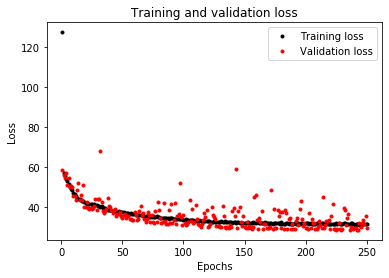

In [13]:
def graph_loss(model_history, skip=0):
  loss = model_history.history["loss"]
  val_loss = model_history.history["val_loss"]

  epochs = range(1, len(loss) + 1)

  plt.plot(epochs[skip:], loss[skip:], "k.", label = "Training loss")
  plt.plot(epochs[skip:], val_loss[skip:], "r.", label = "Validation loss")
  plt.title("Training and validation loss")
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.legend()
  plt.show()

graph_loss(history)

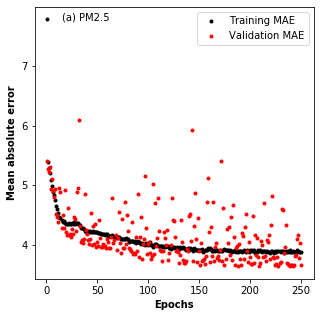

In [14]:
mae = history.history["mae"]
val_mae = history.history["val_mae"]
epochs = range(1, len(mae) + 1)
skip = 0

fig, ax1 = plt.subplots(1, 1, figsize=(5,5))

ax1.plot(epochs[skip:], mae[skip:], "k.", label = "Training MAE")
ax1.plot(epochs[skip:], val_mae[skip:], "r.", label = "Validation MAE")
text_pos_x = 0.10
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM2.5", transform=ax1.transAxes)
ax1.set_xlabel("Epochs", fontweight="bold")
ax1.set_ylabel("Mean absolute error", fontweight="bold")
ax1.legend(loc='upper right')

plt.savefig("Complementation_ML_training_MAE_PM25.png")
plt.show()

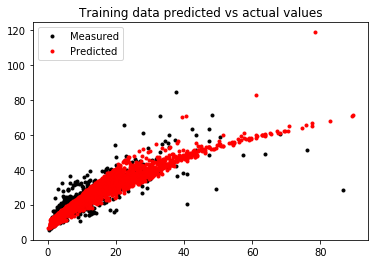

In [15]:
def graph_quality(model):
  predictions = model.predict(x_train)

  plt.clf()
  plt.title("Training data predicted vs actual values")
  plt.plot(x_test["Luftdaten PM2.5"], y_test, "k.", label="Measured")
  plt.plot(x_train["Luftdaten PM2.5"], predictions, "r.", label="Predicted")
  plt.legend()
  plt.show()

graph_quality(model)

## Test trained model

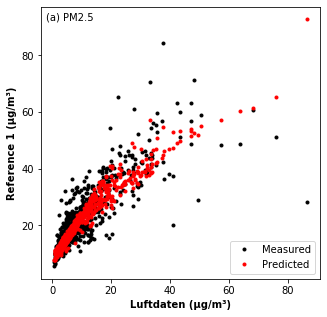

In [34]:
predictions = model.predict(x_test)

fig, ax1 = plt.subplots(1, 1, figsize=(5,5))

ax1.plot(x_test["Luftdaten PM2.5"], y_test, "k.", label="Measured")
ax1.plot(x_test["Luftdaten PM2.5"], predictions, "r.", label="Predicted")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM2.5", transform=ax1.transAxes)
ax1.set_xlabel("Luftdaten (µg/m³)", fontweight="bold")
ax1.set_ylabel("Reference 1 (µg/m³)", fontweight="bold")
ax1.legend(loc='lower right')

plt.savefig("Complementation_ML_training_PM25.png")
plt.show()

In [37]:
output_MAE = "Mean absolute errors for PM2.5\n\
Measured data:,{0:.1f}\n\
Predicted data:,{1:.1f}".format(mean_absolute_error(y_test, x_test["Luftdaten PM2.5"]),
                            mean_absolute_error(predictions, x_test["Luftdaten PM2.5"]))

print(output_MAE.replace(","," "))
print()
output_MSE = "Mean squared errors for PM2.5\n\
Measured data:,{0:.1f}\n\
Predicted data:,{1:.1f}".format(mean_squared_error(y_test, x_test["Luftdaten PM2.5"]),
                            mean_squared_error(predictions, x_test["Luftdaten PM2.5"]))

print(output_MSE.replace(","," "))

Mean absolute errors for PM2.5
Measured data: 12.3
Predicted data: 11.2

Mean squared errors for PM2.5
Measured data: 183.3
Predicted data: 134.1


## Import data from sensors

In [17]:
input_file = "CompareComplementation.csv"

data = pd.read_csv(input_file)
data

,NAM 1 Hum BME280,NAM 1 Hum SHT30,NAM 2 Hum BME280,NAM 2 Hum SHT30,NAM 1 Temp BME280,NAM 1 Temp SHT30,NAM 2 Temp BME280,NAM 2 Temp SHT30,Luftdaten 1 PM10,Luftdaten 2 PM10,...,Luftdaten 1 PM2.5,Luftdaten 2 PM2.5,NAM 1 PM2.5,NAM 2 PM2.5,Reference 1 PM10,Reference 2 PM10,Reference 3 PM10,Reference 1 PM2.5,Reference 2 PM2.5,Reference 3 PM2.5
0,32.98,35.59,29.52,32.98,22.44,22.62,24.35,24.25,2.68,10.27,...,1.76,4.84,1.52,2.49,37.3,10.7,13.3,12.4,2.4,3.9
1,29.13,31.28,27.58,30.53,23.75,24.13,25.11,25.16,2.82,6.03,...,1.62,3.09,1.23,2.46,36.3,11.3,16.5,10.8,2.0,3.1
2,29.48,31.67,28.70,32.03,24.26,24.49,25.40,25.27,2.76,6.36,...,1.66,3.36,1.30,1.98,30.1,9.9,20.4,10.2,1.5,3.3
3,28.76,31.13,28.01,31.30,24.17,24.33,25.25,25.00,2.12,9.83,...,1.52,5.66,1.28,3.35,33.1,12.3,10.6,11.1,1.9,2.7
4,27.21,29.69,27.12,30.23,25.75,25.76,26.10,25.88,2.12,2.30,...,1.52,0.93,1.30,1.04,34.9,13.1,12.8,11.2,1.8,2.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,89.46,85.31,94.57,67.04,20.45,20.58,19.72,25.03,27.61,19.37,...,25.00,13.79,16.25,11.45,34.0,24.4,25.2,30.2,19.7,19.7
8780,81.89,78.67,92.20,64.60,22.03,22.36,20.78,25.86,23.26,18.63,...,21.05,12.93,15.94,12.51,33.1,18.8,19.3,28.1,14.8,14.9
8781,70.47,69.35,83.17,61.38,25.05,25.35,22.73,27.14,18.68,15.48,...,17.02,10.87,13.49,11.55,31.3,17.2,15.6,22.3,13.1,11.1
8782,60.90,61.44,72.81,59.39,27.05,27.34,25.11,27.46,14.55,12.36,...,13.27,8.72,10.95,9.86,36.8,15.1,14.8,20.1,10.7,9.5


## Remove unnecessary data

In [18]:
del data["NAM 1 Hum SHT30"]
del data["NAM 2 Hum SHT30"]
del data["NAM 1 Temp BME280"]
del data["NAM 1 Temp SHT30"]
del data["NAM 2 Temp BME280"]
del data["NAM 2 Temp SHT30"]
del data["Luftdaten 1 PM10"]
del data["Luftdaten 2 PM10"]
del data["NAM 1 PM10"]
del data["NAM 2 PM10"]
del data["Reference 1 PM10"]
del data["Reference 2 PM10"]
del data["Reference 3 PM10"]
data

,NAM 1 Hum BME280,NAM 2 Hum BME280,Luftdaten 1 PM2.5,Luftdaten 2 PM2.5,NAM 1 PM2.5,NAM 2 PM2.5,Reference 1 PM2.5,Reference 2 PM2.5,Reference 3 PM2.5
0,32.98,29.52,1.76,4.84,1.52,2.49,12.4,2.4,3.9
1,29.13,27.58,1.62,3.09,1.23,2.46,10.8,2.0,3.1
2,29.48,28.70,1.66,3.36,1.30,1.98,10.2,1.5,3.3
3,28.76,28.01,1.52,5.66,1.28,3.35,11.1,1.9,2.7
4,27.21,27.12,1.52,0.93,1.30,1.04,11.2,1.8,2.6
...,...,...,...,...,...,...,...,...,...
8779,89.46,94.57,25.00,13.79,16.25,11.45,30.2,19.7,19.7
8780,81.89,92.20,21.05,12.93,15.94,12.51,28.1,14.8,14.9
8781,70.47,83.17,17.02,10.87,13.49,11.55,22.3,13.1,11.1
8782,60.90,72.81,13.27,8.72,10.95,9.86,20.1,10.7,9.5


## Remove rows without data from all sensors

In [19]:
data.replace('', np.nan, inplace=True)
data.dropna(inplace=True)
data

,NAM 1 Hum BME280,NAM 2 Hum BME280,Luftdaten 1 PM2.5,Luftdaten 2 PM2.5,NAM 1 PM2.5,NAM 2 PM2.5,Reference 1 PM2.5,Reference 2 PM2.5,Reference 3 PM2.5
0,32.98,29.52,1.76,4.84,1.52,2.49,12.4,2.4,3.9
1,29.13,27.58,1.62,3.09,1.23,2.46,10.8,2.0,3.1
2,29.48,28.70,1.66,3.36,1.30,1.98,10.2,1.5,3.3
3,28.76,28.01,1.52,5.66,1.28,3.35,11.1,1.9,2.7
4,27.21,27.12,1.52,0.93,1.30,1.04,11.2,1.8,2.6
...,...,...,...,...,...,...,...,...,...
8779,89.46,94.57,25.00,13.79,16.25,11.45,30.2,19.7,19.7
8780,81.89,92.20,21.05,12.93,15.94,12.51,28.1,14.8,14.9
8781,70.47,83.17,17.02,10.87,13.49,11.55,22.3,13.1,11.1
8782,60.90,72.81,13.27,8.72,10.95,9.86,20.1,10.7,9.5


## Calculate average values PM2.5

In [20]:
data["Reference PM2.5"] = (data["Reference 2 PM2.5"] + data["Reference 1 PM2.5"]
                        + data["Reference 3 PM2.5"]) / 3
data

,NAM 1 Hum BME280,NAM 2 Hum BME280,Luftdaten 1 PM2.5,Luftdaten 2 PM2.5,NAM 1 PM2.5,NAM 2 PM2.5,Reference 1 PM2.5,Reference 2 PM2.5,Reference 3 PM2.5,Reference PM2.5
0,32.98,29.52,1.76,4.84,1.52,2.49,12.4,2.4,3.9,6.233333
1,29.13,27.58,1.62,3.09,1.23,2.46,10.8,2.0,3.1,5.300000
2,29.48,28.70,1.66,3.36,1.30,1.98,10.2,1.5,3.3,5.000000
3,28.76,28.01,1.52,5.66,1.28,3.35,11.1,1.9,2.7,5.233333
4,27.21,27.12,1.52,0.93,1.30,1.04,11.2,1.8,2.6,5.200000
...,...,...,...,...,...,...,...,...,...,...
8779,89.46,94.57,25.00,13.79,16.25,11.45,30.2,19.7,19.7,23.200000
8780,81.89,92.20,21.05,12.93,15.94,12.51,28.1,14.8,14.9,19.266667
8781,70.47,83.17,17.02,10.87,13.49,11.55,22.3,13.1,11.1,15.500000
8782,60.90,72.81,13.27,8.72,10.95,9.86,20.1,10.7,9.5,13.433333


## Remove unnecessary data

In [21]:
del data["Reference 1 PM2.5"]
del data["Reference 2 PM2.5"]
del data["Reference 3 PM2.5"]
data

,NAM 1 Hum BME280,NAM 2 Hum BME280,Luftdaten 1 PM2.5,Luftdaten 2 PM2.5,NAM 1 PM2.5,NAM 2 PM2.5,Reference PM2.5
0,32.98,29.52,1.76,4.84,1.52,2.49,6.233333
1,29.13,27.58,1.62,3.09,1.23,2.46,5.300000
2,29.48,28.70,1.66,3.36,1.30,1.98,5.000000
3,28.76,28.01,1.52,5.66,1.28,3.35,5.233333
4,27.21,27.12,1.52,0.93,1.30,1.04,5.200000
...,...,...,...,...,...,...,...
8779,89.46,94.57,25.00,13.79,16.25,11.45,23.200000
8780,81.89,92.20,21.05,12.93,15.94,12.51,19.266667
8781,70.47,83.17,17.02,10.87,13.49,11.55,15.500000
8782,60.90,72.81,13.27,8.72,10.95,9.86,13.433333


## Apply ML model to results from Luftdaten and NAM devices

In [22]:
data_ML = data.copy()
data_ML.reset_index(drop=True, inplace=True)

# Apply ML model to the Luftdaten 1 data
input_data = data_ML.iloc[:,[2,0]].copy()   # Select PM2.5 and Hum columns
predictions = model.predict(input_data)
predictions = pd.Series(predictions.T[0], name="Luftdaten 1 ML PM2.5")   # Convert output to DataFrame
data_ML = pd.concat([data_ML, predictions], axis=1)

# Apply ML model to the NAM 1 data
input_data = data_ML.iloc[:,[4,0]].copy()   # Select PM2.5 and Hum columns
predictions = model.predict(input_data)
predictions = pd.Series(predictions.T[0], name="NAM 1 ML PM2.5")   # Convert output to DataFrame
data_ML = pd.concat([data_ML, predictions], axis=1)

# Apply ML model to the Luftdaten 2 data
input_data = data_ML.iloc[:,[3,1]].copy()   # Select PM2.5 and Hum columns
predictions = model.predict(input_data)
predictions = pd.Series(predictions.T[0], name="Luftdaten 2 ML PM2.5")   # Convert output to DataFrame
data_ML = pd.concat([data_ML, predictions], axis=1)

# Apply ML model to the NAM 2 data
input_data = data_ML.iloc[:,[5,1]].copy()   # Select PM2.5 and Hum columns
predictions = model.predict(input_data)
predictions = pd.Series(predictions.T[0], name="NAM 2 ML PM2.5")   # Convert output to DataFrame
data_ML = pd.concat([data_ML, predictions], axis=1)

data_ML

,NAM 1 Hum BME280,NAM 2 Hum BME280,Luftdaten 1 PM2.5,Luftdaten 2 PM2.5,NAM 1 PM2.5,NAM 2 PM2.5,Reference PM2.5,Luftdaten 1 ML PM2.5,NAM 1 ML PM2.5,Luftdaten 2 ML PM2.5,NAM 2 ML PM2.5
0,32.98,29.52,1.76,4.84,1.52,2.49,6.233333,11.938489,11.545586,17.188305,13.341136
1,29.13,27.58,1.62,3.09,1.23,2.46,5.300000,11.940266,11.301799,14.439778,13.408410
2,29.48,28.70,1.66,3.36,1.30,1.98,5.000000,11.984751,11.395400,14.814601,12.555414
3,28.76,28.01,1.52,5.66,1.28,3.35,5.233333,11.798754,11.405850,18.621307,14.839623
4,27.21,27.12,1.52,0.93,1.30,1.04,5.200000,11.891740,11.531581,10.931254,11.111335
...,...,...,...,...,...,...,...,...,...,...,...
5825,89.46,94.57,25.00,13.79,16.25,11.45,23.200000,32.374596,25.013765,20.830679,18.862196
5826,81.89,92.20,21.05,12.93,15.94,12.51,19.266667,32.182896,27.884184,21.087524,20.734209
5827,70.47,83.17,17.02,10.87,13.49,11.55,15.500000,33.516388,28.892479,23.089678,23.661713
5828,60.90,72.81,13.27,8.72,10.95,9.86,13.433333,29.106447,25.308390,20.943174,22.809458


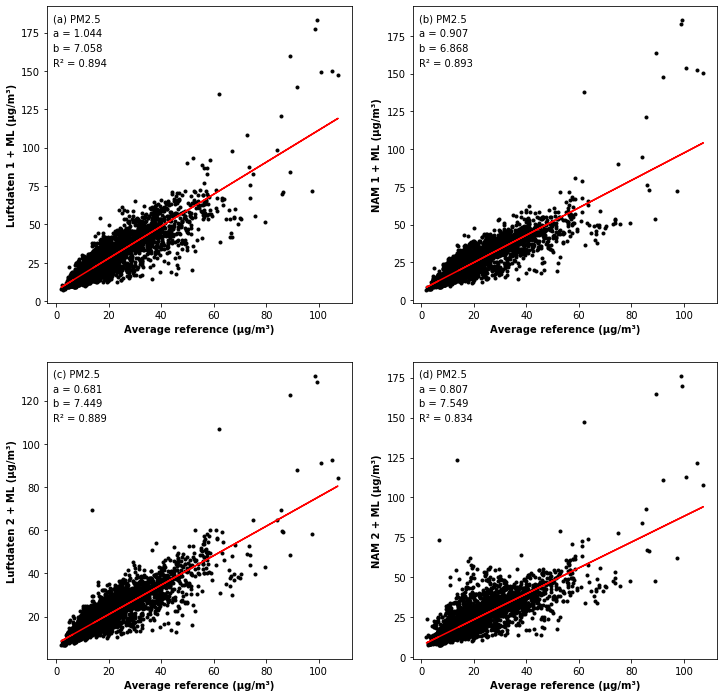

In [23]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12,12))

x = data_ML["Reference PM2.5"]
y = data_ML["Luftdaten 1 ML PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax1.plot(x, y, "k.")
ax1.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) PM2.5", transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax1.transAxes)
ax1.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax1.transAxes)
ax1.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax1.set_ylabel("Luftdaten 1 + ML (µg/m³)", fontweight="bold")

y = data_ML["NAM 1 ML PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax2.plot(x, y, "k.")
ax2.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b) PM2.5", transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax2.transAxes)
ax2.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax2.transAxes)
ax2.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax2.set_ylabel("NAM 1 + ML (µg/m³)", fontweight="bold")

y = data_ML["Luftdaten 2 ML PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax3.plot(x, y, "k.")
ax3.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) PM2.5", transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax3.transAxes)
ax3.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax3.transAxes)
ax3.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax3.set_ylabel("Luftdaten 2 + ML (µg/m³)", fontweight="bold")

y = data_ML["NAM 2 ML PM2.5"]
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
ax4.plot(x, y, "k.")
ax4.plot(x, intercept + slope*x, "r")
text_pos_x = 0.02
text_pos_y = 0.95
ax4.text(text_pos_x, text_pos_y, "(d) PM2.5", transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.05, "a = {0:.3f}".format(slope), transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.10, "b = {0:.3f}".format(intercept), transform=ax4.transAxes)
ax4.text(text_pos_x, text_pos_y - 0.15, "R² = {0:.3f}".format(r_value), transform=ax4.transAxes)
ax4.set_xlabel("Average reference (µg/m³)", fontweight="bold")
ax4.set_ylabel("NAM 2 + ML (µg/m³)", fontweight="bold")

plt.savefig("Complementation_ML_regressions_PM25.png")
plt.show()

### Remove unnecessary data

In [24]:
del data_ML["NAM 1 PM2.5"]
del data_ML["Luftdaten 1 PM2.5"]
del data_ML["NAM 2 PM2.5"]
del data_ML["Luftdaten 2 PM2.5"]
del data_ML["NAM 1 Hum BME280"]
del data_ML["NAM 2 Hum BME280"]

### Reorder columns

In [25]:
col_order = ["Luftdaten 1 ML PM2.5","NAM 1 ML PM2.5", "Luftdaten 2 ML PM2.5", "NAM 2 ML PM2.5",
             "Reference PM2.5"]

data_ML = data_ML[col_order].copy()
data_ML

,Luftdaten 1 ML PM2.5,NAM 1 ML PM2.5,Luftdaten 2 ML PM2.5,NAM 2 ML PM2.5,Reference PM2.5
0,11.938489,11.545586,17.188305,13.341136,6.233333
1,11.940266,11.301799,14.439778,13.408410,5.300000
2,11.984751,11.395400,14.814601,12.555414,5.000000
3,11.798754,11.405850,18.621307,14.839623,5.233333
4,11.891740,11.531581,10.931254,11.111335,5.200000
...,...,...,...,...,...
5825,32.374596,25.013765,20.830679,18.862196,23.200000
5826,32.182896,27.884184,21.087524,20.734209,19.266667
5827,33.516388,28.892479,23.089678,23.661713,15.500000
5828,29.106447,25.308390,20.943174,22.809458,13.433333


### Configure output file

In [26]:
def add_empty_line(filename):
    with open(filename,'a') as file:
        file.write("\n")

def add_text(filename, text):
    with open(filename,'a') as file:
        file.write(text + "\n")

def add_separator(filename):
    with open(filename,'a') as file:
        file.write("##########\n\n")

def clear_file(filename):
    with open(filename,'w') as file:
        file.write("")

comment = "Data description"

output_file = "ResultsComplementation_ML_PM25.csv"
clear_file(output_file)
add_separator(output_file)
add_text(output_file, comment)
add_empty_line(output_file)

### Pearson correlations for PM2.5

In [27]:
result = data_ML.corr(method="pearson").round(3)
add_text(output_file, "Pearson correlations for PM2.5 + ML")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten 1 ML PM2.5,NAM 1 ML PM2.5,Luftdaten 2 ML PM2.5,NAM 2 ML PM2.5,Reference PM2.5
Luftdaten 1 ML PM2.5,1.000,0.957,0.955,0.916,0.894
NAM 1 ML PM2.5,0.957,1.000,0.970,0.938,0.893
Luftdaten 2 ML PM2.5,0.955,0.970,1.000,0.928,0.889
NAM 2 ML PM2.5,0.916,0.938,0.928,1.000,0.834
Reference PM2.5,0.894,0.893,0.889,0.834,1.000


### Kendall correlations for PM2.5

In [28]:
result = data_ML.corr(method="kendall").round(3)
add_text(output_file, "Kendall correlations for PM2.5 + ML")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten 1 ML PM2.5,NAM 1 ML PM2.5,Luftdaten 2 ML PM2.5,NAM 2 ML PM2.5,Reference PM2.5
Luftdaten 1 ML PM2.5,1.000,0.880,0.840,0.818,0.749
NAM 1 ML PM2.5,0.880,1.000,0.879,0.865,0.760
Luftdaten 2 ML PM2.5,0.840,0.879,1.000,0.851,0.727
NAM 2 ML PM2.5,0.818,0.865,0.851,1.000,0.701
Reference PM2.5,0.749,0.760,0.727,0.701,1.000


### Spearman correlations for PM2.5

In [29]:
result = data_ML.corr(method="spearman").round(3)
add_text(output_file, "Spearman correlations for PM2.5 + ML")
result.to_csv(output_file, mode="a")
add_empty_line(output_file)
result

,Luftdaten 1 ML PM2.5,NAM 1 ML PM2.5,Luftdaten 2 ML PM2.5,NAM 2 ML PM2.5,Reference PM2.5
Luftdaten 1 ML PM2.5,1.000,0.979,0.964,0.949,0.913
NAM 1 ML PM2.5,0.979,1.000,0.977,0.961,0.919
Luftdaten 2 ML PM2.5,0.964,0.977,1.000,0.950,0.899
NAM 2 ML PM2.5,0.949,0.961,0.950,1.000,0.878
Reference PM2.5,0.913,0.919,0.899,0.878,1.000


### Mean absolute errors for PM2.5

In [30]:
output_MAE = "Mean absolute errors\n\
Luftdaten 1:,{0:.1f}\n\
Luftdaten 1 + ML:,{1:.1f}\n\
NAM 1:,{2:.1f}\n\
NAM 1 + ML:,{3:.1f}\n\
Luftdaten 2:,{4:.1f}\n\
Luftdaten 2 + ML:,{5:.1f}\n\
NAM 2:,{6:.1f}\n\
NAM 2 + ML:,{7:.1f}".format(mean_absolute_error(data["Reference PM2.5"], data["Luftdaten 1 PM2.5"]),
                            mean_absolute_error(data_ML["Reference PM2.5"], data_ML["Luftdaten 1 ML PM2.5"]),
                            mean_absolute_error(data["Reference PM2.5"], data["NAM 1 PM2.5"]),
                            mean_absolute_error(data_ML["Reference PM2.5"], data_ML["NAM 1 ML PM2.5"]),
                            mean_absolute_error(data["Reference PM2.5"], data["Luftdaten 2 PM2.5"]),
                            mean_absolute_error(data_ML["Reference PM2.5"], data_ML["Luftdaten 2 ML PM2.5"]),
                            mean_absolute_error(data["Reference PM2.5"], data["NAM 2 PM2.5"]),
                            mean_absolute_error(data_ML["Reference PM2.5"], data_ML["NAM 2 ML PM2.5"]))

add_text(output_file, "Mean absolute errors for PM2.5")
add_text(output_file, output_MAE)
add_empty_line(output_file)

print(output_MAE.replace(","," "))

Mean absolute errors
Luftdaten 1: 6.3
Luftdaten 1 + ML: 8.4
NAM 1: 6.8
NAM 1 + ML: 6.2
Luftdaten 2: 9.1
Luftdaten 2 + ML: 4.4
NAM 2: 8.1
NAM 2 + ML: 5.7


### Mean squared errors for PM2.5

In [31]:
output_MSE = "Mean squared errors\n\
Luftdaten 1:,{0:.1f}\n\
Luftdaten 1 + ML:,{1:.1f}\n\
NAM 1:,{2:.1f}\n\
NAM 1 + ML:,{3:.1f}\n\
Luftdaten 2:,{4:.1f}\n\
Luftdaten 2 + ML:,{5:.1f}\n\
NAM 2:,{6:.1f}\n\
NAM 2 + ML:,{7:.1f}".format(mean_squared_error(data["Reference PM2.5"], data["Luftdaten 1 PM2.5"]),
                            mean_squared_error(data_ML["Reference PM2.5"], data_ML["Luftdaten 1 ML PM2.5"]),
                            mean_squared_error(data["Reference PM2.5"], data["NAM 1 PM2.5"]),
                            mean_squared_error(data_ML["Reference PM2.5"], data_ML["NAM 1 ML PM2.5"]),
                            mean_squared_error(data["Reference PM2.5"], data["Luftdaten 2 PM2.5"]),
                            mean_squared_error(data_ML["Reference PM2.5"], data_ML["Luftdaten 2 ML PM2.5"]),
                            mean_squared_error(data["Reference PM2.5"], data["NAM 2 PM2.5"]),
                            mean_squared_error(data_ML["Reference PM2.5"], data_ML["NAM 2 ML PM2.5"]))

add_text(output_file, "Mean squared errors for PM2.5")
add_text(output_file, output_MSE)
add_empty_line(output_file)
add_separator(output_file)

print(output_MSE.replace(","," "))

Mean squared errors
Luftdaten 1: 74.0
Luftdaten 1 + ML: 98.3
NAM 1: 69.7
NAM 1 + ML: 56.8
Luftdaten 2: 119.6
Luftdaten 2 + ML: 34.0
NAM 2: 100.5
NAM 2 + ML: 61.1


## Visualization of the ML influence

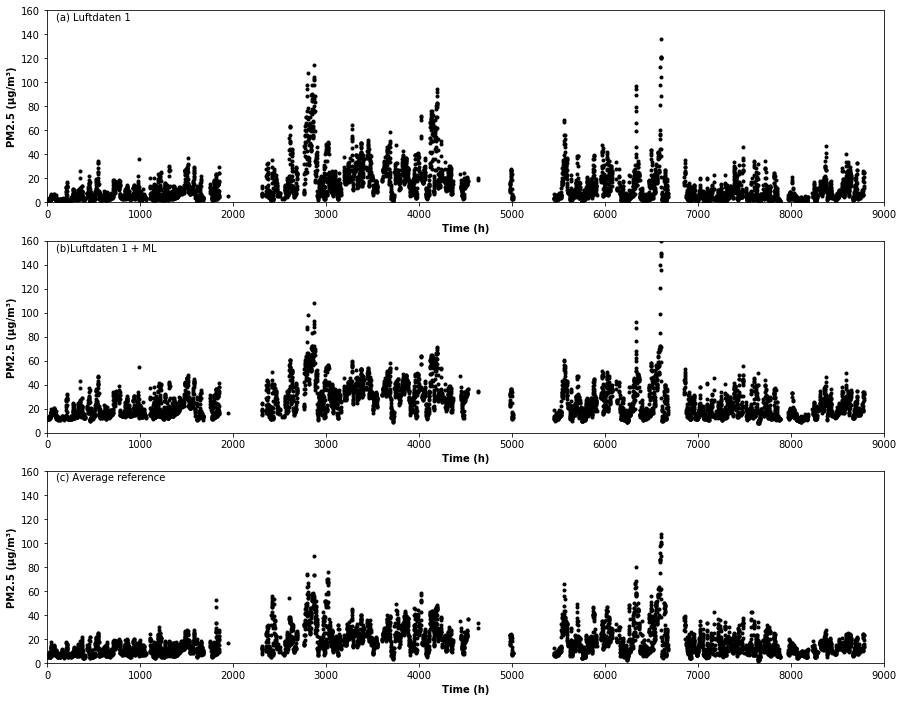

In [32]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15,12))

x = data.index
y1 = data["Luftdaten 1 PM2.5"]
y2 = data_ML["Luftdaten 1 ML PM2.5"]
y3 = data_ML["Reference PM2.5"]

ax1.plot(x, y1, "k.")
ax1.set_xlabel("Time (h)", fontweight="bold")
ax1.set_ylabel("PM2.5 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax1.text(text_pos_x, text_pos_y, "(a) Luftdaten 1", transform=ax1.transAxes)
ax1.set_xlim([0, 9000])
ax1.set_ylim([0, 160])

ax2.plot(x, y2, "k.")
ax2.set_xlabel("Time (h)", fontweight="bold")
ax2.set_ylabel("PM2.5 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax2.text(text_pos_x, text_pos_y, "(b)Luftdaten 1 + ML", transform=ax2.transAxes)
ax2.set_xlim([0, 9000])
ax2.set_ylim([0, 160])

ax3.plot(x, y3, "k.")
ax3.set_xlabel("Time (h)", fontweight="bold")
ax3.set_ylabel("PM2.5 (µg/m³)", fontweight="bold")
text_pos_x = 0.01
text_pos_y = 0.95
ax3.text(text_pos_x, text_pos_y, "(c) Average reference", transform=ax3.transAxes)
ax3.set_xlim([0, 9000])
ax3.set_ylim([0, 160])

plt.savefig("Complementation_ML_example_PM25.png")
plt.show()